Explore and prepare the dataset
First, spend some time exploring the dataset in the. Then we consider how to prepare the dataset for a predictive model. We thought about any new features you want to create in order to make the model even better. 

Train a machine learning model
When the data is ready for modelling, we train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, we used an algorithm that easily allows us to output information about how each variable within the model contributes to its predictive power. Used RandomForest.

Evaluate model and present findings
After training the model, we evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, we create a visualisation to interpret how each variable contributed to the model. Finally, we summarised our findings in a single slide to be sent to a hypothetical manager using powerpoint. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm,skew
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
# load dataset
df_train = pd.read_csv('customer_booking.csv',encoding='latin-1')
df_test = pd.read_csv('customer_booking.csv',encoding='latin-1')

In [3]:
df_train.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [4]:
# The rows and columns of our dataset 
df_train.shape

(50000, 14)

In [5]:
# Datatype of each attribute
df_train.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
# Descriptive Statistics of Numerical Variables
df_train.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [7]:
# Statistics of our Categorical variables
df_train.describe(include=['O'])

sales_channel  trip_type flight_day   route booking_origin
count          50000      50000      50000   50000          50000
unique             2          3          7     799            104
top         Internet  RoundTrip        Mon  AKLKUL      Australia
freq           44382      49497       8102    2680          17872

In [8]:
df_train.duplicated().sum()

719

In [9]:
df_train.drop_duplicates(inplace=True, keep='first')

In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

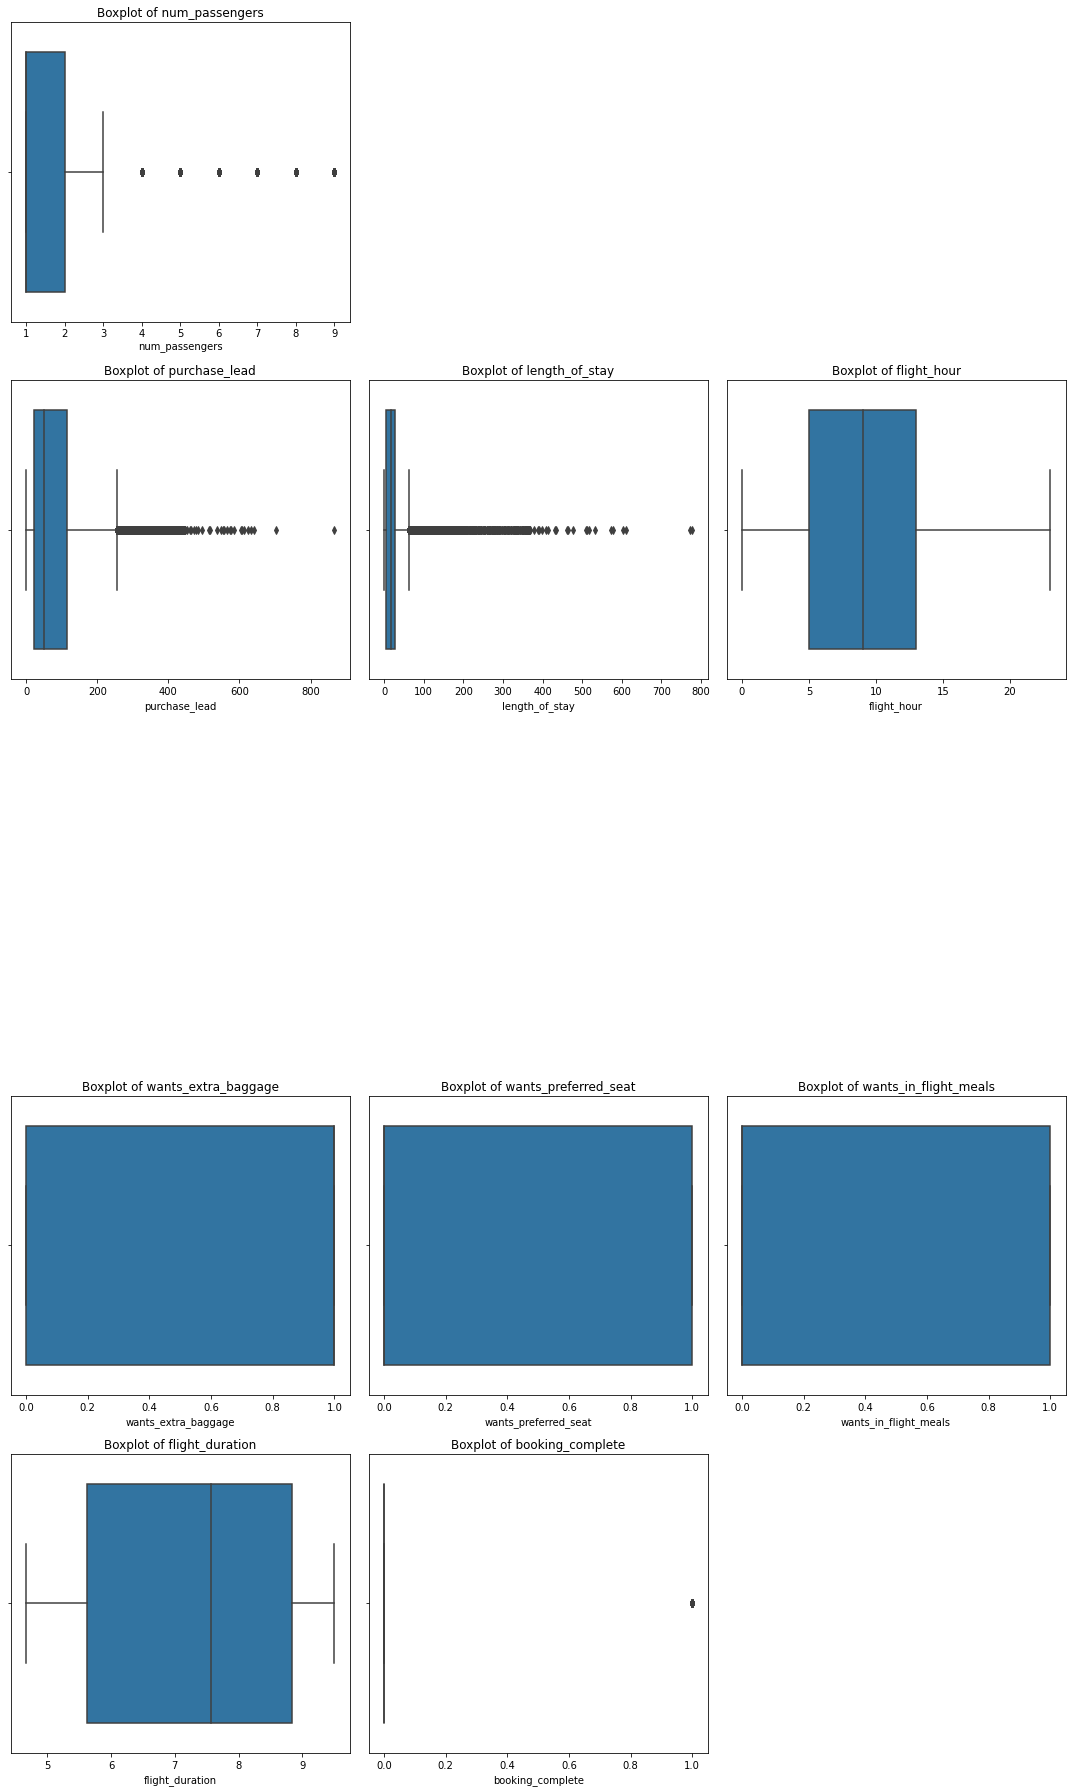

In [12]:
# Outlier Analysis
import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')

#Checking distributions of the various features in the dataset

num_cols = df_train.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(df_train, 1):
    if df_train[col].dtype != 'object':
        plt.subplot(num_rows, 3, i)  # 3 columns per row
        sns.boxplot(x=df_train[col], orient='vertical')
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

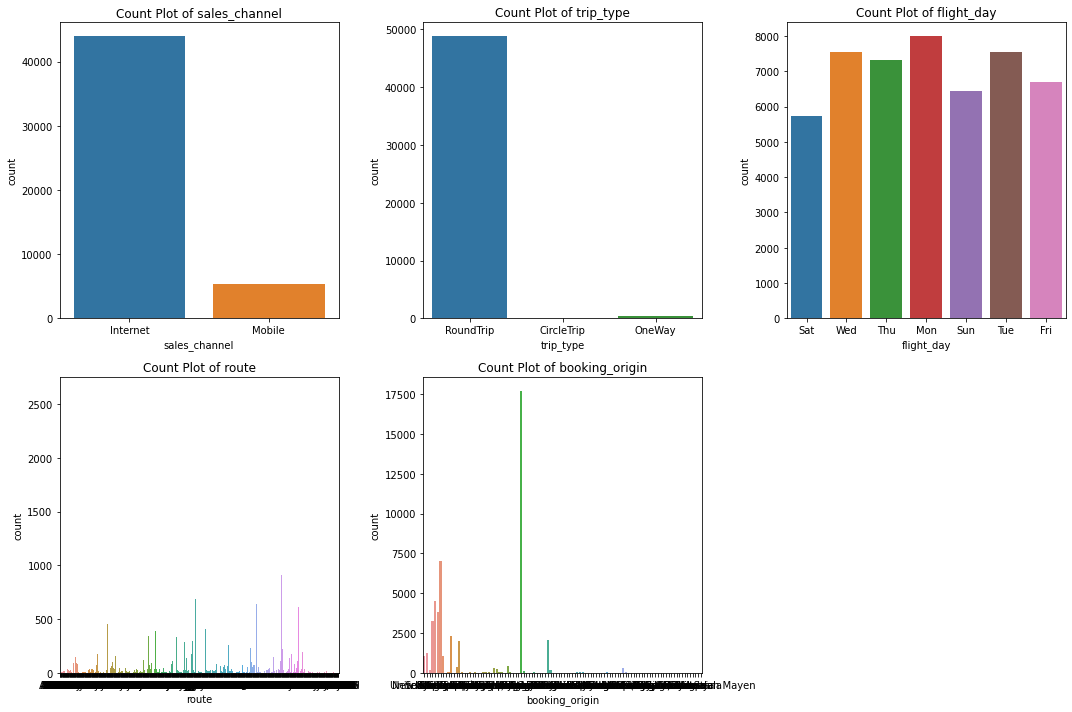

In [13]:
#Distribution of categorical columns

# Identify and filter categorical columns
categorical_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']

# Calculate the number of rows needed based on the number of categorical columns
num_col = len(categorical_cols)
num_row = (num_col + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_row))  # Adjust the figure size based on the number of rows

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_row, 3, i)  # 3 columns per row
    sns.countplot(data=df_train, x=col)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(df_train.corr(), annot=True)

In [14]:
df_train = pd.get_dummies(df_train)
df_train.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Internet  ...  \
0             5.52                 0                    True  ...   
1             5.52                 0                    True  ...   
2             5.52                 0                    True  ...   
3             5.52                 0                    True  ...   
4             5.52                 0                    True  ...   

   booking_origin_Timor-Leste  booking_origin_Tonga  booking_origin_Tunisia  \
0                       False                 False                   False   
1                       False                 False                   False   
2                       False                 False                   False   
3                       False                 False                   False   
4                       False                 False                   False   

   booking_origin_Turkey  booking_origin_Ukraine  \
0                  False                   False   
1                  False                   False   
2                  False                   False   
3                  False                   False   
4                  False                   False   

   booking_origin_United Arab Emirates  booking_origin_United Kingdom  \
0                                False                          False   
1                                False                          False   
2                                False                          False   
3                                False                          False   
4                                False                          False   

   booking_origin_United States  booking_origin_Vanuatu  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   booking_origin_Vietnam  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  

[5 rows x 924 columns]

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_train.columns:
    if df_train[col].dtype == 'bool':
        print(f"Column '{col}' is boolean and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        df_train[col] = le.fit_transform(df_train[col])

df_train.head()

Column 'sales_channel_Internet' is boolean and will be converted to binary using LabelEncoder.
Column 'sales_channel_Mobile' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_CircleTrip' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_OneWay' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_RoundTrip' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Fri' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Mon' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Sat' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Sun' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Thu' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Tue' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_d

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Internet  ...  \
0             5.52                 0                       1  ...   
1             5.52                 0                       1  ...   
2             5.52                 0                       1  ...   
3             5.52                 0                       1  ...   
4             5.52                 0                       1  ...   

   booking_origin_Timor-Leste  booking_origin_Tonga  booking_origin_Tunisia  \
0                           0                     0                       0   
1                           0                     0                       0   
2                           0                     0                       0   
3                           0                     0                       0   
4                           0                     0                       0   

   booking_origin_Turkey  booking_origin_Ukraine  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   booking_origin_United Arab Emirates  booking_origin_United Kingdom  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   booking_origin_United States  booking_origin_Vanuatu  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   booking_origin_Vietnam  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 924 columns]

In [16]:
# X array - drop target
X= df_train.drop(['booking_complete'],axis=1).values

In [17]:
# y array - target only
y=df_train['booking_complete'].values

In [18]:
# Split Train into Train and Validate Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)

In [19]:
# Size of our newly split datasets 
print('Train size: %i' % X_train.shape[0])
print('Validation size: %i' % X_val.shape[0])

Train size: 39424
Validation size: 9857


In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [22]:
# checking the oob score
classifier_rf.oob_score_

0.8500405844155844

In [23]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [24]:
grid_search.best_score_

0.8500913149350648

In [25]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

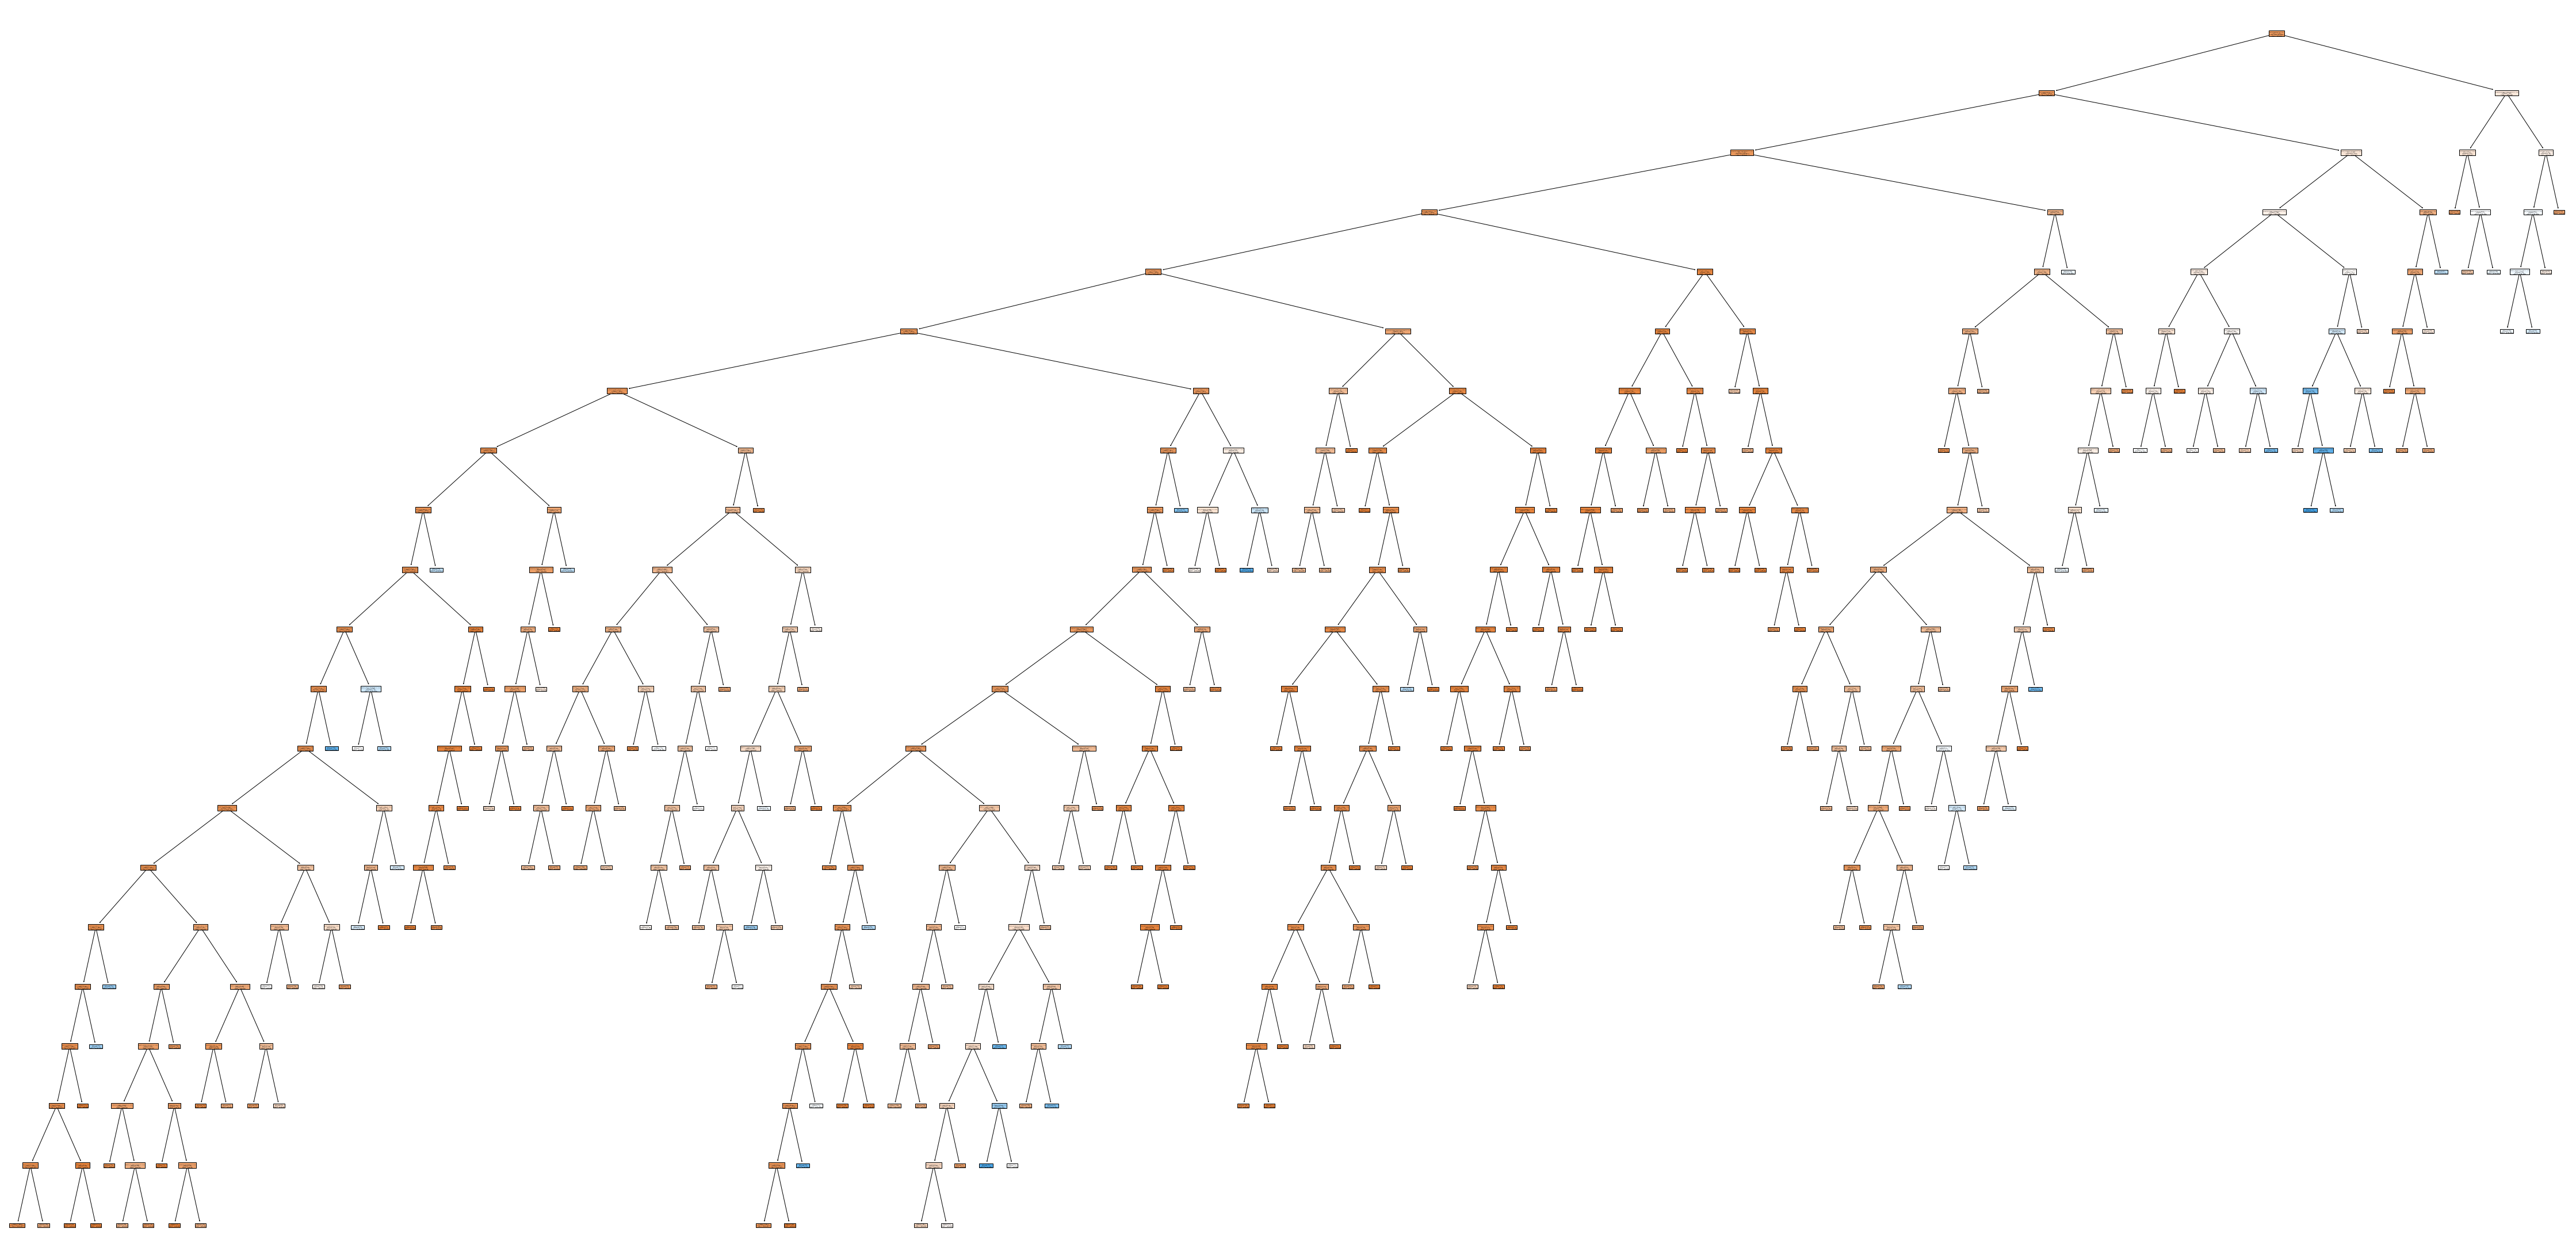

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],   feature_names=df_train.columns,class_names=['booking', "No booking"],filled=True);

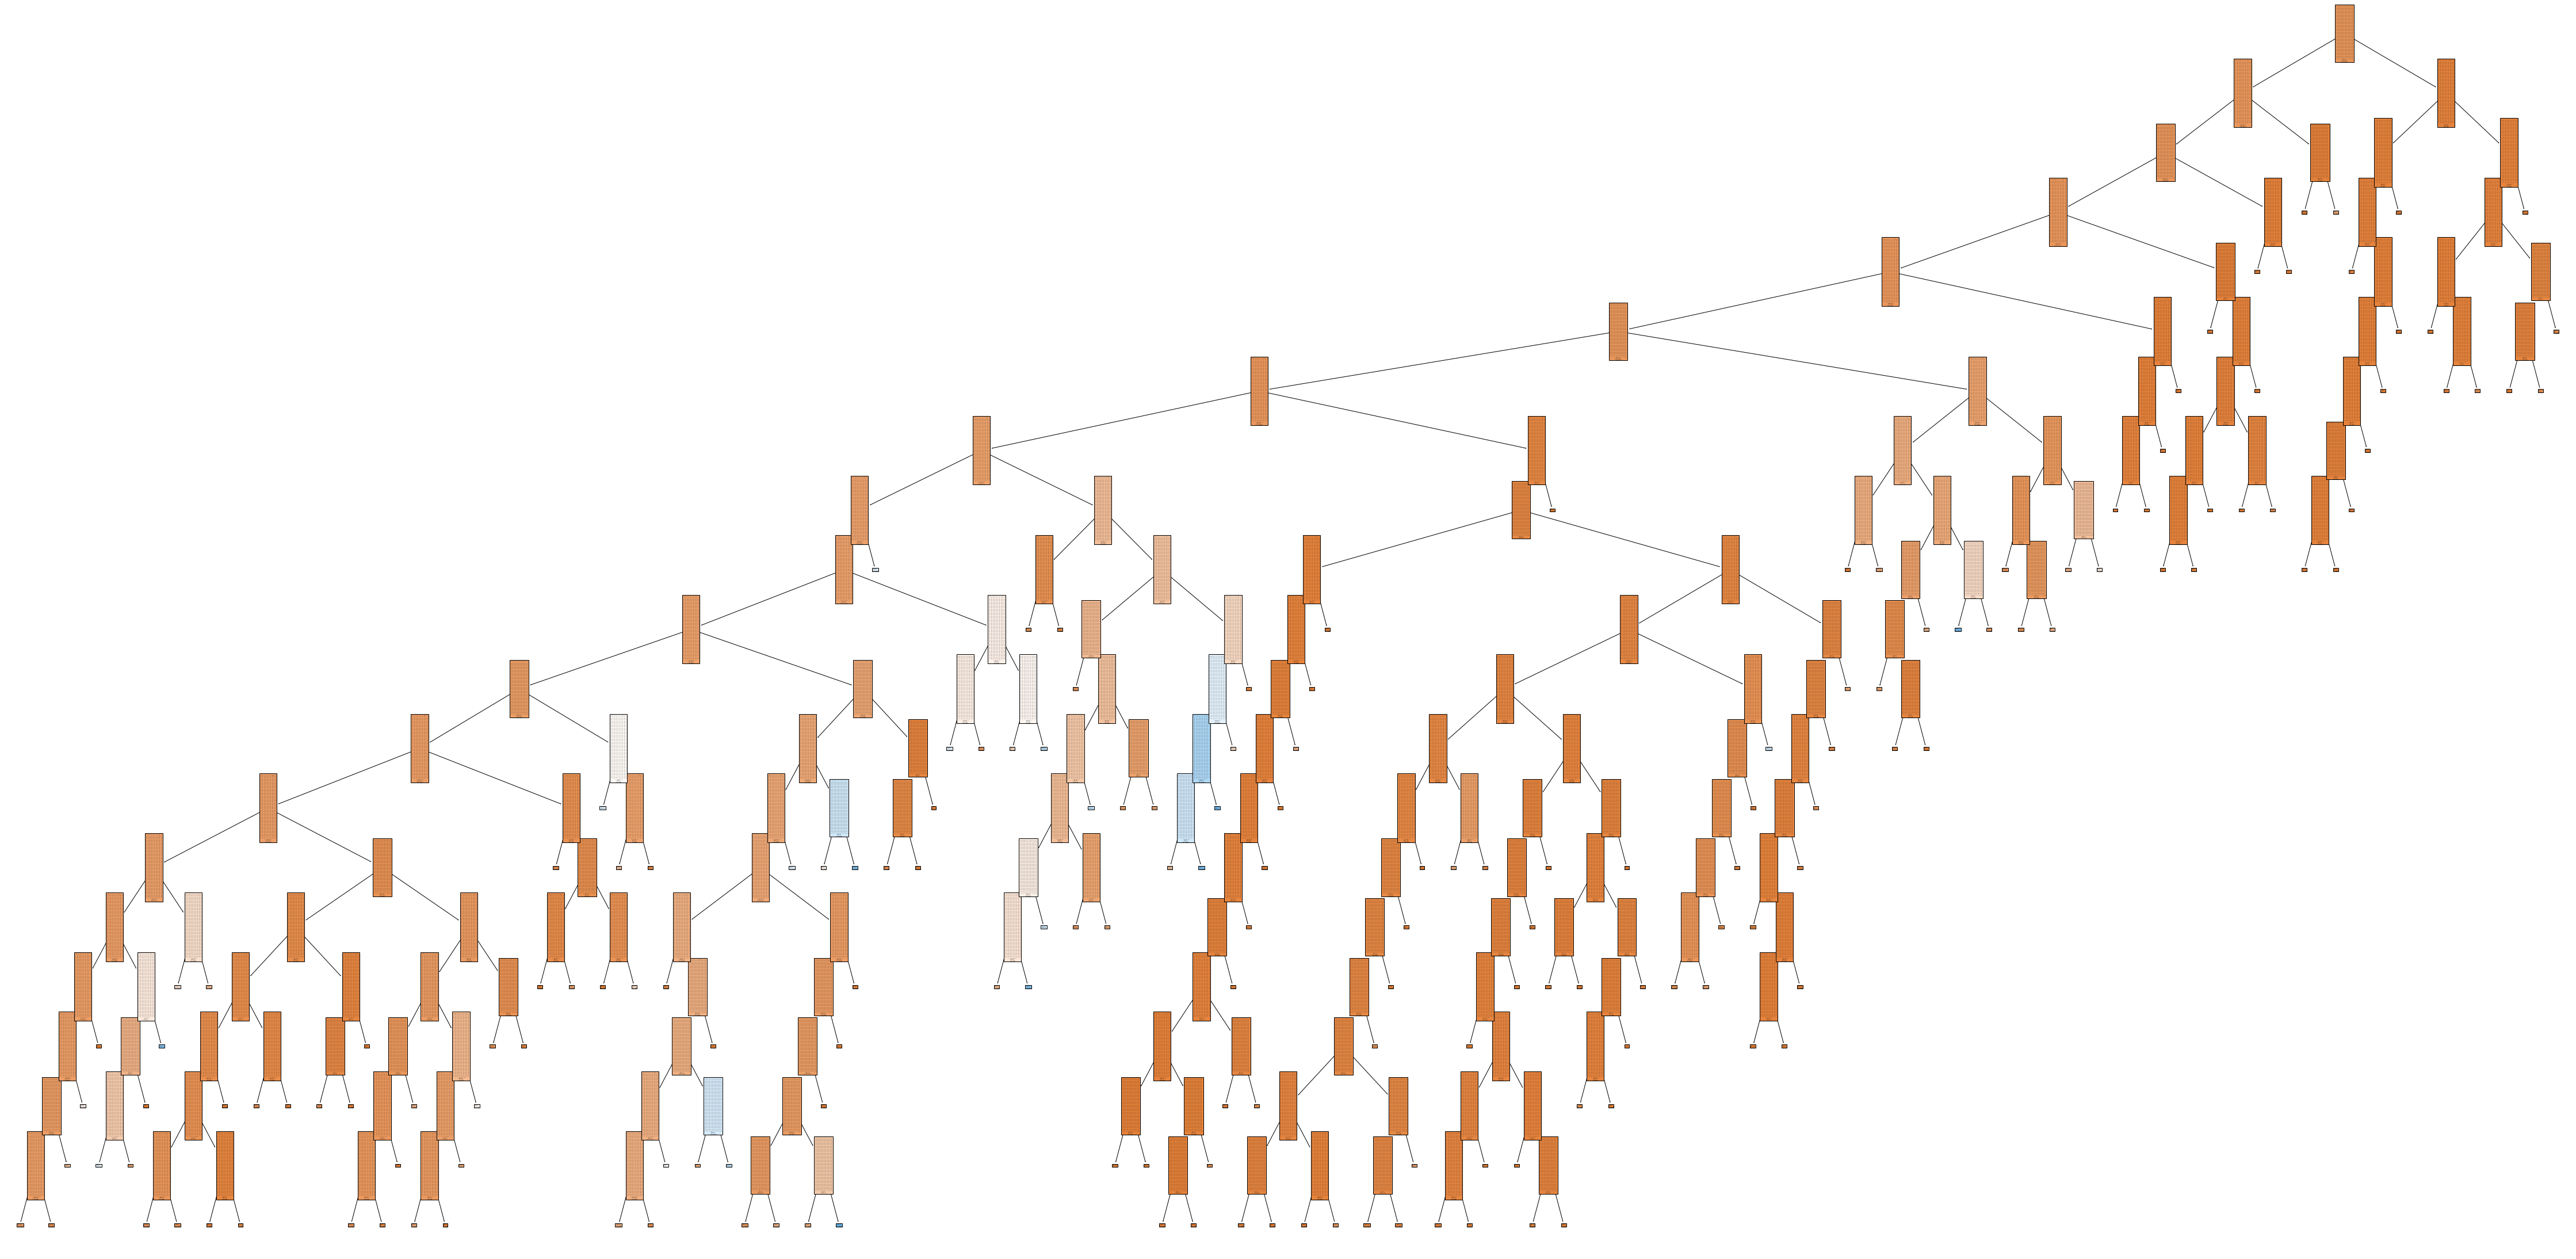

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X,class_names=['booking', "No booking"],filled=True);

The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

In [40]:
rf_best.feature_importances_

array([1.14819816e-02, 2.90702615e-02, 4.54171242e-02, 2.22267923e-02,
       1.81649870e-02, 1.05768535e-02, 1.45682720e-02, 6.43022296e-02,
       4.17635589e-03, 7.66768711e-03, 1.98017178e-04, 1.08030156e-03,
       1.49980389e-03, 2.27669709e-03, 3.14418652e-03, 2.62480004e-03,
       2.32540090e-03, 2.38405764e-03, 3.79533708e-03, 3.86221038e-03,
       5.08278864e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.72341396e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.18394752e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.69027618e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.31082080e-04,
       4.97793336e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [46]:

# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
 #Score the model on the training set 
model.score(X_train, y_train)

0.8713820200164415

In [54]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [51]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              min_samples_leaf=10000)

In [52]:
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=10000, n_jobs=-1, random_state=42)

In [55]:
show_scores(model)

{'Training MAE': 0.2513118850505724,
 'Valid MAE': 0.2514670752779617,
 'Training RMSLE': 0.2480744293174107,
 'Valid RMSLE': 0.24822959648771623,
 'Training R^2': 0.015254048588153712,
 'Valid R^2': 0.014576345424420545}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=2,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3}

In [58]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.2516340147104786,
 'Valid MAE': 0.2518060090958129,
 'Training RMSLE': 0.2465049586947287,
 'Valid RMSLE': 0.2467744142286711,
 'Training R^2': 0.02313952222553184,
 'Valid R^2': 0.021569991194839266}

In [59]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [60]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 0.14831377725279224,
 'Valid MAE': 0.20965842752792035,
 'Training RMSLE': 0.16164900624479125,
 'Valid RMSLE': 0.23407050162665227,
 'Training R^2': 0.564744221656757,
 'Valid R^2': 0.13080396435776076}

In [61]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 0.2516340147104786,
 'Valid MAE': 0.2518060090958129,
 'Training RMSLE': 0.2465049586947287,
 'Valid RMSLE': 0.2467744142286711,
 'Training R^2': 0.02313952222553184,
 'Valid R^2': 0.021569991194839266}

In [62]:
# Import the test data
df_test.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [63]:
df_test.drop_duplicates(inplace=True, keep='first')

In [64]:
df_test = pd.get_dummies(df_test)
df_test.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Internet  ...  \
0             5.52                 0                    True  ...   
1             5.52                 0                    True  ...   
2             5.52                 0                    True  ...   
3             5.52                 0                    True  ...   
4             5.52                 0                    True  ...   

   booking_origin_Timor-Leste  booking_origin_Tonga  booking_origin_Tunisia  \
0                       False                 False                   False   
1                       False                 False                   False   
2                       False                 False                   False   
3                       False                 False                   False   
4                       False                 False                   False   

   booking_origin_Turkey  booking_origin_Ukraine  \
0                  False                   False   
1                  False                   False   
2                  False                   False   
3                  False                   False   
4                  False                   False   

   booking_origin_United Arab Emirates  booking_origin_United Kingdom  \
0                                False                          False   
1                                False                          False   
2                                False                          False   
3                                False                          False   
4                                False                          False   

   booking_origin_United States  booking_origin_Vanuatu  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   booking_origin_Vietnam  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  

[5 rows x 924 columns]

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_test.columns:
    if df_test[col].dtype == 'bool':
        print(f"Column '{col}' is boolean and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        df_test[col] = le.fit_transform(df_test[col])

df_test.head()

Column 'sales_channel_Internet' is boolean and will be converted to binary using LabelEncoder.
Column 'sales_channel_Mobile' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_CircleTrip' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_OneWay' is boolean and will be converted to binary using LabelEncoder.
Column 'trip_type_RoundTrip' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Fri' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Mon' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Sat' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Sun' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Thu' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_day_Tue' is boolean and will be converted to binary using LabelEncoder.
Column 'flight_d

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Internet  ...  \
0             5.52                 0                       1  ...   
1             5.52                 0                       1  ...   
2             5.52                 0                       1  ...   
3             5.52                 0                       1  ...   
4             5.52                 0                       1  ...   

   booking_origin_Timor-Leste  booking_origin_Tonga  booking_origin_Tunisia  \
0                           0                     0                       0   
1                           0                     0                       0   
2                           0                     0                       0   
3                           0                     0                       0   
4                           0                     0                       0   

   booking_origin_Turkey  booking_origin_Ukraine  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   booking_origin_United Arab Emirates  booking_origin_United Kingdom  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   booking_origin_United States  booking_origin_Vanuatu  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   booking_origin_Vietnam  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 924 columns]

In [66]:
 df_test.drop("booking_complete", axis=1, inplace=True)

In [67]:
 df_test.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  sales_channel_Internet  sales_channel_Mobile  ...  \
0             5.52                       1                     0  ...   
1             5.52                       1                     0  ...   
2             5.52                       1                     0  ...   
3             5.52                       1                     0  ...   
4             5.52                       1                     0  ...   

   booking_origin_Timor-Leste  booking_origin_Tonga  booking_origin_Tunisia  \
0                           0                     0                       0   
1                           0                     0                       0   
2                           0                     0                       0   
3                           0                     0                       0   
4                           0                     0                       0   

   booking_origin_Turkey  booking_origin_Ukraine  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   booking_origin_United Arab Emirates  booking_origin_United Kingdom  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   booking_origin_United States  booking_origin_Vanuatu  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   booking_origin_Vietnam  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 923 columns]

In [71]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [72]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["booking_complete"] = test_preds
df_preds

booking_complete
0              0.021259
1              0.016201
2              0.007024
3              0.020356
4              0.005357
...                 ...
49276          0.070671
49277          0.023936
49278          0.051225
49279          0.028466
49280          0.011619

[49281 rows x 1 columns]

In [73]:
# Export prediction data
df_preds.to_csv("bookingtest_predictions.csv", index=False)

In [74]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.63699380e-02, 1.25947376e-01, 7.71803766e-02, 7.36078259e-02,
       1.41781272e-02, 1.30314237e-02, 1.24419037e-02, 3.33357753e-02,
       6.53717292e-03, 6.27446941e-03, 9.12818687e-05, 3.92418888e-04,
       3.35904379e-04, 8.86539851e-03, 1.02531143e-02, 8.63642199e-03,
       9.55878676e-03, 1.01267741e-02, 9.54410444e-03, 1.10802590e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.24674891e-03, 0.00000000e+00,
       4.04857888e-04, 1.68865924e-04, 0.00000000e+00, 6.14842533e-04,
       5.42466949e-04, 1.62927439e-04, 4.33653882e-04, 1.52983317e-04,
       2.87011750e-04, 0.00000000e+00, 0.00000000e+00, 1.56289949e-05,
       3.13295448e-04, 0.00000000e+00, 0.00000000e+00, 2.26198050e-04,
       5.96418995e-04, 8.96564458e-06, 7.90676325e-04, 7.77452703e-04,
       0.00000000e+00, 5.30735097e-06, 5.21764422e-04, 9.81368079e-05,
       8.42591117e-04, 2.18939944e-04, 0.00000000e+00, 0.00000000e+00,
      

In [76]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

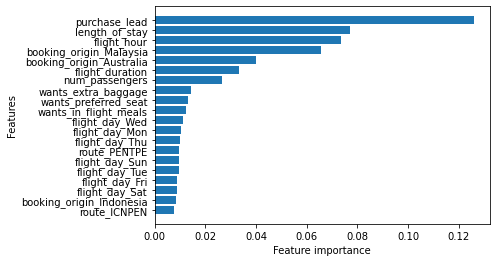

In [87]:
columns_ = df_test.columns
plot_features(columns_, ideal_model.feature_importances_)